In [52]:
# By Ismael Valenzuela (@aboutsecurity / @thinkredactblue)

# https://medium.com/@n0psl1de/mitre-att-ck-via-jupyter-notebooks-for-beginners-838bb380145c
# https://attack.mitre.org/resources/working-with-attack/

In [53]:
import pandas as pd
import janitor as jn
import plotly.express as px

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [54]:
url_attack = 'https://attack.mitre.org/docs/enterprise-attack-v14.1/enterprise-attack-v14.1.xlsx'
df_datasources = pd.read_excel(url_attack, sheet_name='datasources')
df_tactics = pd.read_excel(url_attack, sheet_name='tactics')
df_techniques = pd.read_excel(url_attack, sheet_name='techniques')
df_relationships = pd.read_excel(url_attack, sheet_name='relationships')
df_mitigations = pd.read_excel(url_attack, sheet_name='mitigations')
df_software = pd.read_excel(url_attack, sheet_name='software')
df_groups = pd.read_excel(url_attack, sheet_name='groups')

In [55]:
df_datasources = jn.clean_names(df_datasources)
df_tactics = jn.clean_names(df_tactics)
df_techniques = jn.clean_names(df_techniques)
df_relationships = jn.clean_names(df_relationships)
df_mitigations = jn.clean_names(df_mitigations)
df_software = jn.clean_names(df_software)
df_groups = jn.clean_names(df_groups)

In [56]:
# Convert string of data sources to a list of data sources
df_techniques['data_sources'] = df_techniques['data_sources'].str.split(",")
# Use Pandas explode function to expand the list of data sources to separate rows
df_techniques = df_techniques.explode('data_sources').reset_index(drop=True)
# Get the technique ID and data sources then drop duplicate rows; place the output in a new data frame called 'viz_data' that'll be used for our visualization.
viz_data = df_techniques[['data_sources','id']].drop_duplicates().groupby(['data_sources']).size().reset_index()
# Rename column to 'count' in preparation for visualization
viz_data.columns = viz_data.columns.map(str)
viz_data = viz_data.rename(columns={"0": "count"})

In [57]:
fig_te_by_ds  = px.bar(viz_data.sort_values('count', ascending=False).head(50), x='data_sources', y='count', title='MITRE ATT&CK: Sub-Technique Count by Data Source (Top 25)', labels={'count':'Technique Count', 'data_sources':'Data Source'})
fig_te_by_ds.show()

In [58]:
df_software_malware = df_software.loc[df_software['type'] == 'malware']

df_software_malware.describe()


,version
count,563.000000
mean,1.202327
std,0.364592
min,1.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,3.100000


In [59]:
df_groups[df_groups['description'].str.contains("retail")]['description']

49    [FIN13](https://attack.mitre.org/groups/G1016)...
52    [FIN6](https://attack.mitre.org/groups/G0037) ...
53    [FIN7](https://attack.mitre.org/groups/G0046) ...
54    [FIN8](https://attack.mitre.org/groups/G0061) ...
Name: description, dtype: object

In [60]:
df_groups_FIN7 = df_groups.loc[df_groups['name'] == 'FIN7']

df_groups_FIN7

,id,stix_id,name,description,url,created,last_modified,domain,version,contributors,associated_groups,associated_groups_citations,relationship_citations
53,G0046,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,FIN7,[FIN7](https://attack.mitre.org/groups/G0046) ...,https://attack.mitre.org/groups/G0046,31 May 2017,04 October 2023,"enterprise-attack,ics-attack",3.0,Edward Millington,"Carbon Spider, GOLD NIAGARA, ITG14",(Citation: CrowdStrike Carbon Spider August 20...,"(Citation: Trustwave Pillowmint June 2020),(Ci..."


In [61]:
df_relationships_FIN7 = df_relationships.loc[df_relationships['source_name'] == 'FIN7']

df_relationships_FIN7 = df_relationships_APT28.loc[df_relationships_APT28['target_type'] == 'software']

df_relationships_FIN7

,source_id,source_name,source_ref,source_type,mapping_type,target_id,target_name,target_ref,target_type,mapping_description,stix_id,created,last_modified
4209,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0552,AdFind,tool--f59508a6-3615-47c3-b493-6676e1a39a87,software,(Citation: CrowdStrike Carbon Spider August 2021),relationship--210b5693-f039-4853-a0ea-70b4fa3a...,15 October 2021,15 October 2021
4210,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0415,BOOSTWRITE,malware--56d10a7f-bb42-4267-9b4c-63abb9c06010,software,(Citation: FireEye FIN7 Oct 2019),relationship--ece11a34-960b-4ead-8258-02bee1bb...,11 October 2019,11 October 2019
4211,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0030,Carbanak,malware--72f54d66-675d-4587-9bd3-4ed09f9522e4,software,(Citation: FireEye FIN7 March 2017)(Citation: ...,relationship--7577e14c-ceba-4646-98ce-41e7fa9a...,31 May 2017,04 October 2023
4212,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0154,Cobalt Strike,malware--a7881f21-e978-4fe4-af56-92c9416a2616,software,(Citation: CrowdStrike Carbon Spider August 20...,relationship--9c61749d-ad78-476d-8cd6-ba4eafc8...,23 September 2021,04 October 2023
4213,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0488,CrackMapExec,tool--c4810609-7da6-48ec-8057-1b70a7814db0,software,\n(Citation: CrowdStrike Carbon Spider August ...,relationship--707474c8-890d-4be2-81d5-f6a4902b...,23 September 2021,23 September 2021
4214,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0417,GRIFFON,malware--04fc1842-f9e4-47cf-8cb8-5c61becad142,software,(Citation: SecureList Griffon May 2019)(Citati...,relationship--08678e7f-c675-4f85-9593-f06cb90f...,11 October 2019,14 January 2022
4215,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0151,HALFBAKED,malware--0ced8926-914e-4c78-bc93-356fb90dbd1f,software,(Citation: FireEye FIN7 April 2017)(Citation: ...,relationship--49d09bc3-cdc0-479b-8516-f64bff9b...,14 December 2017,30 June 2019
4216,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0648,JSS Loader,malware--f559f945-eb8b-48b1-904c-68568deebed3,software,(Citation: CrowdStrike Carbon Spider August 2021),relationship--3f4ff91e-a279-4777-b362-a57b0c4c...,22 September 2021,22 September 2021
4217,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0681,Lizar,malware--f74a5069-015d-4404-83ad-5ca01056c0dc,software,(Citation: Threatpost Lizar May 2021)(Citation...,relationship--d736ba76-c58b-4010-865e-68cd67fa...,02 February 2022,05 April 2022
4218,G0046,FIN7,intrusion-set--3753cc21-2dae-4dfb-8481-d004e74...,group,uses,S0002,Mimikatz,tool--afc079f3-c0ea-4096-b75d-3f05338b7f60,software,(Citation: CrowdStrike Carbon Spider August 2021),relationship--0ea53e8d-743e-4828-8c65-9b610593...,23 September 2021,23 September 2021


In [62]:
df_relationships_FIN7.count()

source_id              17
source_name            17
source_ref             17
source_type            17
mapping_type           17
target_id              17
target_name            17
target_ref             17
target_type            17
mapping_description    17
stix_id                17
created                17
last_modified          17
dtype: int64

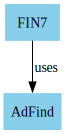

In [63]:

import graphviz
f = graphviz.Digraph(filename = "output/attacktree.gv")

names = ["1","2"]
positions = [df_relationships_FIN7['source_name'].iloc[0],
             df_relationships_FIN7['target_name'].iloc[0]]
for name, position in zip (names, positions):
     f.node(name, position, shape = "record", style = "filled", color = "skyblue")
 
#Specify edges
f.edge("1","2", label=" uses");

f